# <div align="center"> CycleGAN 框架参数定义 </div>

## 参数定义

如果参数用户不设置, 可以不用传, 底层直接使用默认值 
 
### 基础参数

参数名 | 类型 | 默认值 | 值域 | 描述
:---: | :---: | :---: | :--- | :--- |    
<img width=100/> | <img width=80/> | <img width=80/> | <img width=150/> | <img width=400/>
verbose | bool | false | | 调试输出
gpu_ids | string | 0 | -1<br>[0]<br>0 | 单GPU不建议修改

### 数据集参数

参数名 | 类型 | 默认值 | 值域 | 描述
:---: | :---: | :---: | :--- | :--- |    
<img width=100/> | <img width=80/> | <img width=80/> | <img width=150/> | <img width=400/>
dataroot | string | | PATH |数据集路径
max_dataset_size | int | $\infty$ | (1, +$\infty$) | 如果数据集图片太多,可以设置该值,使用全量数据集的子集训练
load_size | int | 286 | (28, 512] | 加载图片前缩放到指定大小, **不建议用户设置**
crop_size | int | 256 | (28, load_size] | 对图片中心裁剪, **不建议用户设置**
no_flip | bool | true | | 是否对图片做flip增强
batch_size | int | 4 | [1,4] | 一次处理图片的个数
num_threads | int | 4 | [1, 8] | 加载数据集的线程数
serial_batches | bool | true | | 是否对数据集shuffle
dataset_mode | string | unaligned | unaligned<br>aligned<br>single<br>colorization | 加载数据集模式 (预测时为single）

### 模型参数

模型相关的参数一旦修改, <font color='blue'/>**原训练出的模型权重将不可用, 即continue_train必须为False**</font>

参数名 | 类型 | 默认值 | 值域 | 描述
:---: | :---: | :---: | :--- | :--- |    
<img width=100/> | <img width=80/> | <img width=80/> | <img width=150/> | <img width=400/>
model | string | cycle_gan | cycle_gan<br>pix2pix<br>test | 指定模型 (预测时设置为‘test’）
netD | string | basic | basic<br>n_layers<br>pixel | 指定辨别器框架 
netG | string | resnet_9blocks | resnet_9blocks <br>resnet_6blocks <br>unet_256 <br>unet_128`| 指定生成器框架
n_layers_D | int | 3 | (0, 9] | 如果netD 设置为 n_layers, 该选项才会使用
norm | string | instance | instance <br>batch <br>none | 正则化方式
init_type | string | normal | normal <br>xavier <br>kaiming <br>orthogonal | 网络初始化方式
init_gain | float | 0.02 | (0, 1) | init_type初始化值的缩放因子
no_dropout | bool | true | | 是否对生成器网络进行dropout (cyclegan强制为true)
direction | string | AtoB | AtoB<br>BtoA | 翻译图片方向
checkpoints_dir | string | `/cache/ckpts` | | **不可修改**

### 训练参数

参数名 | 类型 | 默认值 | 值域 | 描述
:---: | :---: | :---: | :--- | :--- |    
<img width=100/> | <img width=80/> | <img width=80/> | <img width=150/> | <img width=400/>
print_freq | int | 50 | [1, +$\infty$) | 训练结果数据输出频率
save_latest_freq | int | 200 | [1, +$\infty$) | 保存模型权重的频率, 多少个迭代保存一次
continue_train | bool | true | | 是否加载最新的权重继续训练
beta1 | float | 0.5 | (0, 1) | Adam优化器动量参数
lr | float | 0.0002 | (0, 1) | 基础学习率(Adam)
lr_policy | string | linear | linear<br>step<br>plateau<br>cosine | 学习率更新策略
lr_decay_iters | int | 50 | [10, +$\infty$)| 如果lr_policy为step, 则该参数有效, LR每lr_decay_iters多步更新:$lr = \gamma * lr$
n_epochs | int | 100 | [10, +$\infty$) | 循环epochs次数
gan_mode | string | lsgan | vanilla<br>lsgan<br>wgangp | GAN目标类型

### 评估参数

参数名 | 类型 | 默认值 | 值域 | 描述
:---: | :---: | :---: | :--- | :--- |    
<img width=100/> | <img width=80/> | <img width=80/> | <img width=150/> | <img width=400/>
results_dir | string | `/cache/results` | | **不可修改**
num_test | int | 50 | [1, +$\infty$) | 评估时使用的图片数
aspect_ratio | float | 1.0 | (0, +$\infty$) | 评估输出的图片缩放比例

### 单张预测参数

参数名 | 类型 | 默认值 | 值域 | 描述
:---: | :---: | :---: | :--- | :--- |    
<img width=100/> | <img width=80/> | <img width=80/> | <img width=150/> | <img width=400/>
b64_image | string | | | 预测图片的base64

## Rest API

In [1]:
%reload_ext autoreload
%autoreload 2

In [17]:
import sys
import time
import os
import base64
import requests
import json
import base64
from io import BytesIO
from PIL import Image
from IPython.display import HTML
from k12libs.utils.nb_easy import k12ai_get_data

In [3]:
g_host = '116.85.5.40'
g_port = 8119

In [4]:
config = {
    'dataroot': '/datasets/horse2zebra',
    'checkpoints_dir': '/cache/ckpts',
    'model': 'cycle_gan',
    'netD': 'basic',
    'netG': 'resnet_9blocks',
    'norm': 'instance',
    'init_type': 'normal',
    'init_gain': 0.02,
    'no_dropout': True,
    'dataset_mode': 'unaligned',
    'direction': 'AtoB',
    'num_threads': 4,
    'batch_size': 4,
    'max_dataset_size': 2000,
    'no_flip': True,
    'print_freq': 2,
    'save_latest_freq': 20,
    'continue_train': True,
    'beta1': 0.5,
    'lr': 0.002,
    'lr_policy': 'linear',
    'lr_decay_iters': 10,
    'n_epochs': 120,
    'gan_mode': 'lsgan',
    'verbose': True,
}

In [5]:
def post_gan_request(uri, op, user, uuid, params=None):
    if not params:
        params = '{}'
    if isinstance(params, dict):
        params = json.dumps(params)
    data = json.loads('''{
        "token": "123456",
        "op":"%s",
        "user": "%s",
        "service_name": "k12gan",
        "service_uuid": "%s",
        "service_params": %s
    }''' % (op, user, uuid, params))
    api = 'http://%s:%d/%s' % (g_host, g_port, uri)
    res = requests.post(url=api, json=data).text
    return {
        'req': data,
        'res': json.loads(res)
    }

api = 'k12ai/framework/execute'

### 启动训练(train.start)

In [ ]:
train_key = 'framework/16601548608/1/train'
config['max_dataset_size'] = 1024
post_gan_request(api, 'train.start', '16601548608', '1',  config)

In [ ]:
time.sleep(5)
k12ai_get_data(train_key, 'metrics', num=2, waitcnt=12, rm=True)

### 停止训练((train.stop)

In [6]:
post_gan_request(api, 'train.stop', '16601548608', '1')

{'req': {'token': '123456',
  'op': 'train.stop',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '1',
  'service_params': {}},
 'res': {'code': 100205,
  'message': {'en': 'task is not found or not running',
   'cn': '任务停止错误: 请求的服务不存在或者未启动'}}}

### 恢复训练(train.resume)

In [ ]:
post_gan_request(api, 'train.resume', '16601548608', '1')

In [ ]:
time.sleep(5)
k12ai_get_data(train_key, 'metrics', num=2, waitcnt=12, rm=True)

In [ ]:
post_gan_request(api, 'train.stop', '16601548608', '1')
time.sleep(5)

### 启动评估(evaluate.start)

In [8]:
test_key = 'framework/16601548608/1/evaluate'
config['results_dir'] = '/cache/results'
config['num_test'] = 3
post_gan_request(api, 'evaluate.start', '16601548608', '1', config)

{'req': {'token': '123456',
  'op': 'evaluate.start',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '1',
  'service_params': {'dataroot': '/datasets/horse2zebra',
   'checkpoints_dir': '/cache/ckpts',
   'model': 'cycle_gan',
   'netD': 'basic',
   'netG': 'resnet_9blocks',
   'norm': 'instance',
   'init_type': 'normal',
   'init_gain': 0.02,
   'no_dropout': True,
   'dataset_mode': 'unaligned',
   'direction': 'AtoB',
   'num_threads': 4,
   'batch_size': 4,
   'max_dataset_size': 2000,
   'no_flip': True,
   'print_freq': 2,
   'save_latest_freq': 20,
   'continue_train': True,
   'beta1': 0.5,
   'lr': 0.002,
   'lr_policy': 'linear',
   'lr_decay_iters': 10,
   'n_epochs': 120,
   'gan_mode': 'lsgan',
   'verbose': True,
   'results_dir': '/cache/results',
   'num_test': 3}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}}}

In [15]:
results = {}
data = k12ai_get_data(test_key, 'metrics', num=6, waitcnt=30, rm=True)
if data is not None:
    for item in data:
        d = item['value']['data'][0]['data']
        title = '_'.join(d['title'].split('_')[1:])
        results[title] = base64.b64decode(d['payload'])
print(len(results))

6


In [42]:
keys = list(results.keys())
keys

['real_A', 'fake_B', 'rec_A', 'real_B', 'fake_A', 'rec_B']

In [39]:
# HTML(data='<img src="data:image/png;base64,{}"/>'.format(b64str))
# import matplotlib.pyplot as plt 
# fig = plt.figure(figsize=(24, 12))
# fig, axes = plt.subplots(2, 3)
# plt.axis('off')
# for key, imgbytes in results.items():
#     image = Image.open(BytesIO(imgbytes))
#     plt.imshow(image);

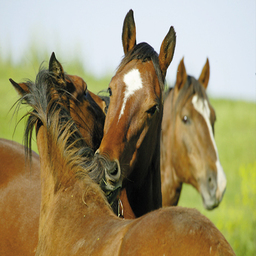

In [48]:
Image.open(BytesIO(results['real_A']))

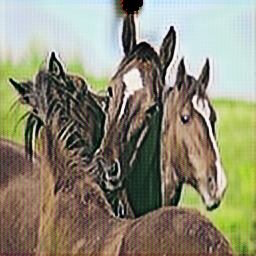

In [50]:
Image.open(BytesIO(results['fake_B']))

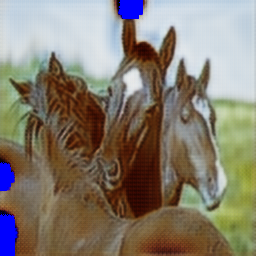

In [51]:
Image.open(BytesIO(results['rec_A']))

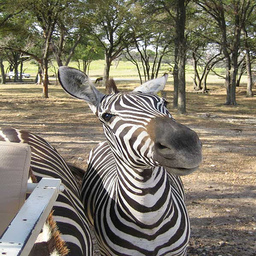

In [52]:
Image.open(BytesIO(results['real_B']))

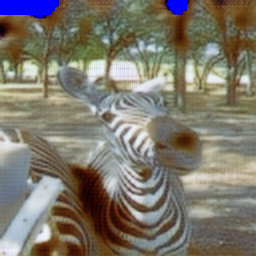

In [53]:
Image.open(BytesIO(results['fake_A']))

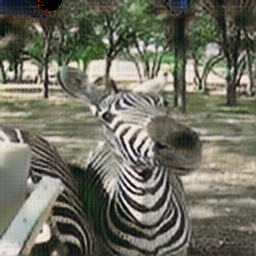

In [55]:
Image.open(BytesIO(results['rec_B']))

### 停止评估(evaluate.stop)

In [ ]:
post_gan_request(api, 'evaluate.stop', '16601548608', '1')

### 启动预测

In [71]:
test_key = 'framework/16601548608/1/predict'
config_predict = {}
config_predict['b64_image'] = base64.b64encode(results['real_A']).decode()
post_gan_request(api, 'predict.start', '16601548608', '1', config_predict)

{'req': {'token': '123456',
  'op': 'predict.start',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '1',
  'service_params': {'b64_image': 'iVBORw0KGgoAAAANSUhEUgAAAQAAAAEACAIAAADTED8xAAEAAElEQVR4nJz9ebA1SXYfhp1zMqvqbm//tt67Z3qmsc0ABCGBCBG2SDNky2KEbTksMWQ7wpREi6GgwxT/l/SHQ3KYVjgcNk0qJJKhAGHZXECCpLkAxDYABgMMZqZn6Zmeme7p5duXt929qjLP+fmPrKpb9773NSBVv/j63rq1ZJ48+5b89vsPmBwAcUREMGZmYiOCgJmZiIyEBcwMAAAzg4iIRISIvElgCDG1BzM7ZgBExuwYZAQjYnYsymbG7MgRkbE5YgapEDEzEVvzCmMiZgDMTih9aF/BBsARE5FSc95ReiNx82oiIscCJiK0Z5hBYOoexSCFCkM4YwKY1Jq5gIlBzVQdNfeDm9uI0nO5GSQjzaB9NaVHCDERAGKGGZMAIGEi4nbkZCBhEFH3NBCYqHsac3qIEFt7VweQbtZEBGve2cyX04uJGMzMzGpGRMIMNoIAxCBwu9INpJpbmikQoZn25hNgLTyFJC0ZAUhTIDB4AwcARN3jaQOxtNBm3aptlnhzI4gckSmY2EQkTS0hQLusIHLCpg3yuIR7RNK9iMhaAHdAMzP1IkIEMiYCETkGMxmzgNCDMkFARkhLxwICGxMRRJkYREzSTaNdFbCjNGNq1lJAxCwiZGREzoiZwARAEoElvE/QJWJmgRER2skQN/BKKOmo+QDaQDwhDBHb5jQTkVDCQDSTSNTFxKDI5o2YWJiYE1oQmJDQMEEORCB2Ymn0REzMRg0AEg63A+DmnQ0oCBDqIUUaX/ok7f+71WXquEz3gRrM7c+xjytKJCzM

In [72]:
results = {}
data = k12ai_get_data(test_key, 'metrics', num=1, waitcnt=30, rm=True)
if data is not None:
    for item in data:
        d = item['value']['data'][0]['data']
        title = '_'.join(d['title'].split('_')[1:])
        results[title] = base64.b64decode(d['payload'])

1


In [73]:
keys = list(results.keys())
keys

['fake']

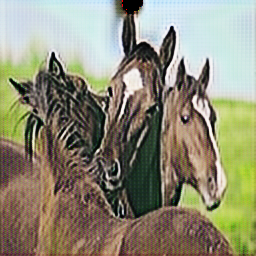

In [74]:
Image.open(BytesIO(results['fake']))

## Metrics

### 学习率

```json
{
    "_id_": "29f8d6abe3f2d9fe",            // Metric类型的唯一标识
    "category": "训练",                     // 所属分类
    "type": "scalar",                      // 数据类型为**散点图**
    "data": {
        "title": "训练_学习率",              // 标题
        "payload": {                       // 数据正文
            "x": {
                "label": "iteration",      // X坐标标签
                "value": 4                 // X坐标值
            }, 
            "y": [                         // Y坐标可能表示多个对象, 所以用数组, 学习率只有一个对象元素
                {
                    "label": "学习率",      // Y坐标标签
                    "value": 0.002         // Y坐标值
                }
            ]
        }
    }
}
```

### 损失率 (cyclegan为6个)

```json
{
    "_id_": "00e1533091cf39a2",                 // Metric类型的唯一标识
    "category": "训练",                         // 所属分类
    "type": "scalar",                          // 数据类型为**散点图** (多目标情况)
    "data": {
        "title": "训练_损失",
        "payload": {
            "x": {
                "label": "iteration",          // X坐标标签
                "value": 4                     // X坐标值
            },
            "y": [
                {
                    "label": "D_A",                    // Loss: D_A
                    "value": 0.3190716505050659
                },
                {
                    "label": "G_A",                    // Loss: G_A
                    "value": 1.2214336395263672
                },
                {
                    "label": "cycle_A",                // Loss: cycle_A
                    "value": 1.5418702363967896
                },
                {
                    "label": "idt_A",                  // Loss: idt_A
                    "value": 0.6913891434669495
                },
                {
                    "label": "D_B",                    // Loss: D_B
                    "value": 0.3450987935066223
                },
                {
                    "label": "G_B",                    // Loss: G_B
                    "value": 0.17797976732254028
                },
                {
                    "label": "cycle_B",                // Loss: cycle_B
                    "value": 1.3113596439361572
                },
                {
                    "label": "idt_B",                  // Loss: idt_B
                    "value": 0.6880873441696167
                }
            ]
        }
    }
}
```

### 评估: Fake图片(6个)

`'real_A', 'fake_B', 'rec_A', 'real_B', 'fake_A', 'rec_B'`

```json
{
    "_id_": "75a9ea167c9f24a7",
    "category": "评估",
    "type": "image",
    "data": {
        "title": "评估_n02381460_1000_fake_A",
        "payload": "base64string"
    },
    "format": "base64string"
}
```              